In [3]:
import numpy as np
import logging
import time

from astroscrappy import detect_cosmics
from lacosmic import lacosmic
from PyCosmic import det_cosmics

from scrs import Image, Simage
from scrs.cosmics import simulate_crs
from scrs.constants import OUT_DIR

In [2]:
IMG_SIZE = (9000, 9000)

logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

logger = logging.getLogger()

In [4]:
SAT_LEVEL = 65536 * 0.8
READOUT_OFFSET = 0
NUM_STARS = 1000
MAX_SIGMA = 10
ALLOW_SATURATION = False


# Generate an image with 1000 stars. Only save the last operation.
img = (
    Simage()
    .enable_history(OUT_DIR / "test.fits")
    .set_data(np.zeros(IMG_SIZE, dtype=np.uint16))
    .add_stars(
        num_stars=NUM_STARS, max_sigma=MAX_SIGMA, sat_level=SAT_LEVEL, allow_sat=ALLOW_SATURATION
    )
    .apply(lambda data: simulate_crs(data, conversion_factor=.001))
    .add_noise()
    # .add_spectra(...)
    # .add_cosmics(...)
)

INFO:scrs.image.image:Ran enable_history on image.
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Saved history [f2b139ac-0df8-443e-a7cb-2b3d48ea1a20] for set_data
INFO:scrs.image.simage:Ran add_stars on image.
INFO:scrs.image.image:Saved history [7d2fdad1-9f7d-4aab-a6f2-e44c83fd7cc1] for add_stars
INFO:scrs.image.image:Ran apply on image.
INFO:scrs.image.image:Saved history [d1a6cf07-4de5-4780-845e-f2c77653150a] for apply
INFO:scrs.image.simage:Ran add_noise on image.
INFO:scrs.image.image:Saved history [2235a75d-c389-447c-b4e0-5c5d9e79237d] for add_noise


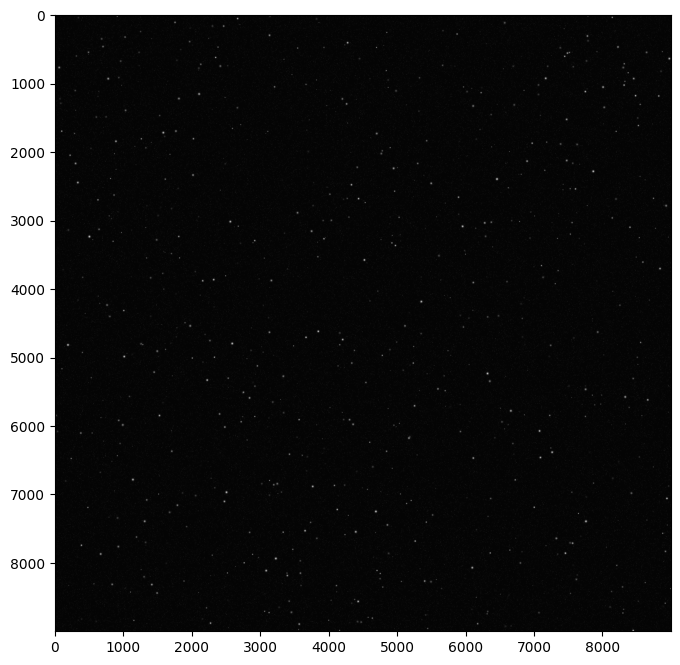

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(img.data, cmap="gray", vmin=0, vmax=SAT_LEVEL)
plt.show()

INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran set_data on image.


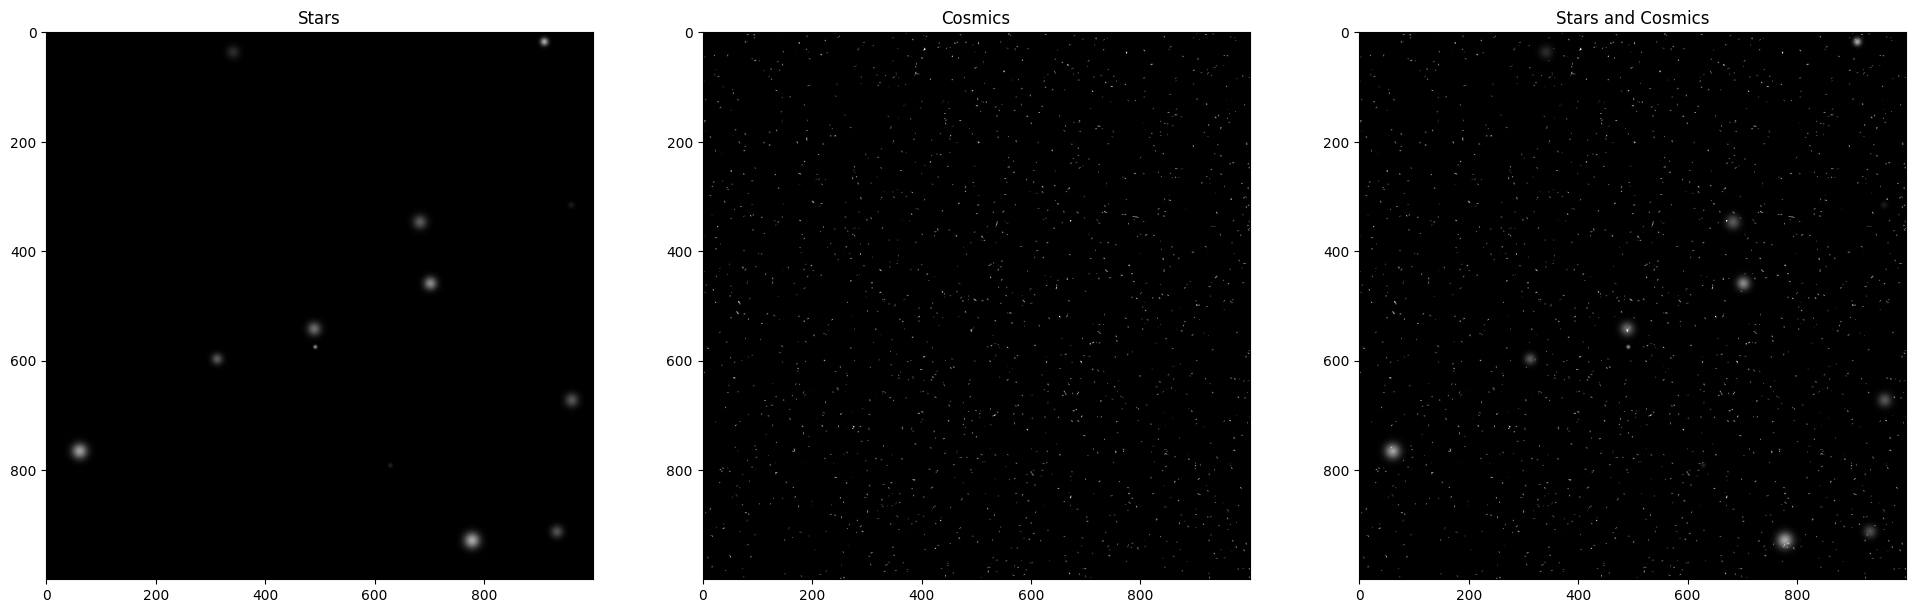

In [6]:
stars = img.get_snapshot(idx=2).data
stars_and_cosmics = img.get_snapshot(idx=1).data
cosmics = img.get_diff(1, 2).data

region = slice(0, 1000), slice(0, 1000)

V_MIN = 0

fig, ax = plt.subplots(1, 3, figsize=(24, 8))
ax[0].imshow(stars[region], cmap="gray", vmin=V_MIN, vmax=SAT_LEVEL)
ax[0].set_title("Stars")
ax[1].imshow(cosmics[region], cmap="gray", vmin=V_MIN, vmax=SAT_LEVEL)
ax[1].set_title("Cosmics")
ax[2].imshow(stars_and_cosmics[region], cmap="gray", vmin=V_MIN, vmax=SAT_LEVEL)
ax[2].set_title("Stars and Cosmics")
plt.show()

In [11]:
to = time.time()
lc_clean, lc_mask = lacosmic(img.data, contrast=5, cr_threshold=4.5, neighbor_threshold=0.3, effective_gain=1, readnoise=1)
print(f"lacosmic done in {time.time() - to:.2f}s")

INFO:astropy:Iteration 1: Found 444098 cosmic-ray pixels, Total: 444098


INFO: Iteration 1: Found 444098 cosmic-ray pixels, Total: 444098 [lacosmic.core]


INFO:astropy:Iteration 2: Found 8907 cosmic-ray pixels, Total: 453005


INFO: Iteration 2: Found 8907 cosmic-ray pixels, Total: 453005 [lacosmic.core]


INFO:astropy:Iteration 3: Found 129 cosmic-ray pixels, Total: 453134


INFO: Iteration 3: Found 129 cosmic-ray pixels, Total: 453134 [lacosmic.core]


INFO:astropy:    Found 1 5x5 masked regions while cleaning.


INFO:     Found 1 5x5 masked regions while cleaning. [lacosmic.core]


INFO:astropy:Iteration 4: Found 84 cosmic-ray pixels, Total: 453218


INFO: Iteration 4: Found 84 cosmic-ray pixels, Total: 453218 [lacosmic.core]


INFO:astropy:    Found 7 5x5 masked regions while cleaning.


INFO:     Found 7 5x5 masked regions while cleaning. [lacosmic.core]
lacosmic done in 435.30s


In [10]:
t0 = time.time()
ac_mask, as_clean = detect_cosmics(img.data)
print(f"astroscrappy done in {time.time() - t0:.2f}s")

astroscrappy done in 24.39s


In [12]:
to = time.time()
pc_img = det_cosmics(img.data)
print(f"PyCosmic done in {time.time() - to:.2f}s")

PyCosmic done in 370.68s


In [14]:
Image(lc_mask.astype(int)).enable_history(OUT_DIR / "lacosmic_cr.fits")
Image(ac_mask.astype(int)).enable_history(OUT_DIR / "astroscrappy_cr.fits")
Image(pc_img.mask.astype(int)).enable_history(OUT_DIR / "pycosmic_cr.fits")

INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran enable_history on image.
INFO:scrs.image.image:Saved history [ba1ffa1d-db35-4000-8abd-1dd70183819b] for enable_history
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran enable_history on image.
INFO:scrs.image.image:Saved history [790f9ef5-eb5a-46f3-b558-ebfb87ee5c91] for enable_history
INFO:scrs.image.image:Ran set_data on image.
INFO:scrs.image.image:Ran enable_history on image.
INFO:scrs.image.image:Saved history [3f2cbb30-cf8a-429d-bfb0-dac8b381e3e2] for enable_history
